### Computer Science Department
CS 509 - Pattern recognition
Assignment 3

Parametric models: Maximum Likelihood Estimation, Bayesian Estimation,

and EM algorithm

NAME: MABLINE ANDREA

STUDENT ID: 002351505

GROUP NAME: A3 F 

Problem 1: Programming exercises in Maximum Likelihood Estimation and Bayesian
Estimation

Consider Gaussian density models in different dimensions.

1.Write a Python program to find the maximum likelihood values μ̂ and σ̂ Apply your program individually to each of the three features xi of category ω1 in the table above.

In [69]:
import numpy as np

data_points_ = {
    "x1": [0.42, -0.2, 1.3, 0.39, -1.6, -0.029, -0.23, 0.27, -1.9, 0.87],
    "x2": [-0.087, -3.3, -0.32, 0.71, -5.3, 0.89, 1.9, -0.3, 0.76, -1.0],
    "x3": [0.58, -3.4, 1.7, 0.23, -0.15, -4.7, 2.2, -0.87, -2.1, -2.6]
}

def calculate_mle(data):
    mu_hat = np.mean(data)
    sigma_hat_squared = np.var(data, ddof=0)  
    return mu_hat, sigma_hat_squared


for feature_name, data in data_points_.items():
    mu_hat, sigma_hat_squared = calculate_mle(data)
    print(f"Feature {feature_name}: μ̂ = {mu_hat}, σ̂² = {sigma_hat_squared}")


Feature x1: μ̂ = -0.07089999999999999, σ̂² = 0.9061772899999999
Feature x2: μ̂ = -0.6047, σ̂² = 4.200714809999999
Feature x3: μ̂ = -0.9109999999999999, σ̂² = 4.541949000000001


2.Modify your program to apply to two-dimensional Gaussian data p(x)~N(μ, Σ). Apply
your data to each of the three possible pairings of two features for ω1.

In [70]:
import numpy as np

data_points_ = {
    "x1": [0.42, -0.2, 1.3, 0.39, -1.6, -0.029, -0.23, 0.27, -1.9, 0.87],
    "x2": [-0.087, -3.3, -0.32, 0.71, -5.3, 0.89, 1.9, -0.3, 0.76, -1.0],
    "x3": [0.58, -3.4, 1.7, 0.23, -0.15, -4.7, 2.2, -0.87, -2.1, -2.6]
}


def calculate_2d_gaussian_data_mle(data1, data2):
    data = np.array([data1, data2]).T
    
    mu_hat = np.mean(data, axis=0)
    sigma_hat = np.cov(data, rowvar=False, ddof=0) 
    
    return mu_hat, sigma_hat

pairs = [("x1", "x2"), ("x1", "x3"), ("x2", "x3")]

for feature1, feature2 in pairs:
    mu_hat, sigma_hat = calculate_2d_gaussian_data_mle(data_points_[feature1], data_points_[feature2])
    print(f"Pair ({feature1}, {feature2}):")
    print(f"Mean vector μ̂ = {mu_hat}")
    print(f"Covariance matrix Σ̂ =\n{sigma_hat}\n")


Pair (x1, x2):
Mean vector μ̂ = [-0.0709 -0.6047]
Covariance matrix Σ̂ =
[[0.90617729 0.56778177]
 [0.56778177 4.20071481]]

Pair (x1, x3):
Mean vector μ̂ = [-0.0709 -0.911 ]
Covariance matrix Σ̂ =
[[0.90617729 0.3940801 ]
 [0.3940801  4.541949  ]]

Pair (x2, x3):
Mean vector μ̂ = [-0.6047 -0.911 ]
Covariance matrix Σ̂ =
[[4.20071481 0.7337023 ]
 [0.7337023  4.541949  ]]



3.Modify your program to apply to three-dimensional Gaussian data. Apply your data to the
full three-dimensional data for ω1.

In [71]:
import numpy as np
data_points_ = {
    "x1": [0.42, -0.2, 1.3, 0.39, -1.6, -0.029, -0.23, 0.27, -1.9, 0.87],
    "x2": [-0.087, -3.3, -0.32, 0.71, -5.3, 0.89, 1.9, -0.3, 0.76, -1.0],
    "x3": [0.58, -3.4, 1.7, 0.23, -0.15, -4.7, 2.2, -0.87, -2.1, -2.6]
}

data = np.array([data_points_["x1"], data_points_["x2"], data_points_["x3"]]).T

def calculate_3d_gaussian_data_mle(data):
    
    mu_hat = np.mean(data, axis=0)
    
    sigma_hat = np.cov(data, rowvar=False, ddof=0)  
    return mu_hat, sigma_hat
mu_hat, sigma_hat = calculate_3d_gaussian_data_mle(data)

print("The complete three-dimensional data for w1 (x1, x2, x3):")
print(f"Mean vector μ̂ = {mu_hat}")
print(f"Covariance matrix Σ̂ =\n{sigma_hat}")


The complete three-dimensional data for w1 (x1, x2, x3):
Mean vector μ̂ = [-0.0709 -0.6047 -0.911 ]
Covariance matrix Σ̂ =
[[0.90617729 0.56778177 0.3940801 ]
 [0.56778177 4.20071481 0.7337023 ]
 [0.3940801  0.7337023  4.541949  ]]


4.Assume your three-dimensional model is separable, so that Σ = diag(σ1
2
, σ2
2
, σ3
2
). Write a
program to estimate the mean and the diagonal components of Σ. Apply your program to
the data in ω2.

In [72]:
import numpy as np

data_points_ = {
    "x1": [-0.4, -0.31, 0.38, -0.15, -0.35, 0.17, -0.011, -0.27, -0.065, -0.12],
    "x2": [0.58, 0.27, 0.055, 0.53, 0.47, 0.69, 0.55, 0.61, 0.49, 0.054],
    "x3": [0.089, -0.04, -0.035, 0.011, 0.034, 0.1, -0.18, 0.12, 0.0012, -0.063]
}

def calculate_3d_separable_mle(data_points):
    means = {}
    variances = {}
    
    for feature_name, values in data_points.items():
        mu_hat = np.mean(values)
        means[feature_name] = mu_hat
        
        sigma_hat_squared = np.var(values, ddof=0) 
        variances[feature_name] = sigma_hat_squared
    
    return means, variances
means, variances = calculate_3d_separable_mle(data_points_)
print("Mean vector μ̂:")
for feature, mean in means.items():
    print(f"  {feature}: {mean}")

print("\nDiagonal components of Σ (variances):")
for feature, variance in variances.items():
    print(f"  {feature}: {variance}")


Mean vector μ̂:
  x1: -0.11259999999999999
  x2: 0.42990000000000006
  x3: 0.003720000000000001

Diagonal components of Σ (variances):
  x1: 0.05392584
  x2: 0.04597009
  x3: 0.0072655055999999996


5.Compare your results for the mean of each feature μi calculated in the above ways. Explain
why they are the same or different.

The mean is a measure of central tendency, the mean is calculated directly from the data points and irresspective of the data being modeled in 1, 2 or3 dimensions as such, the mean results are going to remain the same.

6.Compare your results for the variance of each feature σi
2
calculated in the above ways.

Explain why they are the same or different.

For the single-feature approach in the first case, the variance for each of the three features xi is calculated individually. For the separable three-dimensional model, where the covariance matrix is diagonal which represents the variances for each feature,such that there is independence among features. Since, the formual and the method to calculate the variance is identical for both cases, the results should also be the same for both case provided we use the same data for both the cases.

Problem 3: Programming exercises for EM algorithm

Suppose we know that the ten data points in category ω1 in the table above come from a three-
dimensional Gaussian. Suppose, however, that we do not have access to the x3 components for the

even-numbered data points.


1. Write an EM program in Python to estimate the mean and covariance of the distribution.
Start your estimate with μ0 = 0 and Σ0 = I, the three-dimensional identity matrix. Display
the obtained result in form of clusters.
(Hint: for the missing x3, you can simply attribute the value zero or x1+x2/2)
In addition, I provided you the implementation of GMM)






In [73]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

data_2 = np.array([
    [0.42, -0.087, 0.58],
    [-0.2, -3.3, 0],  #For the missing x3 substituting it with zero
    [1.3, -0.32, 1.7],
    [0.39, 0.71, 0],  #For the missing x3 substituting it with zero
    [-1.6, -5.3, -0.15],
    [-0.029, 0.89, 0], #For the missing x3 substituting it with zero 
    [-0.23, 1.9, 2.2],
    [0.27, -0.3, 0], #For the missing x3 substituting it with zero
    [-1.9, 0.76, -2.1],
    [0.87, -1.0, 0]  #For the missing x3 substituting it with zero
])

for i in range(len(data_2)):
    if i % 2 != 0:  
        data_2[i, 2] = (data_2[i, 0] + data_2[i, 1]) / 2
        
initial_mean = np.zeros(3)
initial_covariance = np.eye(3)

gmm = GaussianMixture(n_components=1, covariance_type='full', init_params='random', random_state=0)
gmm.means_init = [initial_mean]
gmm.covariances_init = [initial_covariance]

gmm.fit(data_2)

estimated_mean = gmm.means_[0]
estimated_covariance = gmm.covariances_[0]

print("estimated Mean with Missing Data (EM):", estimated_mean)
print("estimated Covariance with Missing Data (EM):\n", estimated_covariance)

gmm_diag = GaussianMixture(n_components=1, covariance_type='diag', init_params='random', random_state=0)
gmm_diag.means_init = [initial_mean]
gmm_diag.fit(data_2)
labels_02 = gmm_full.predict(data_2)

estimated_mean_diag = gmm_diag.means_[0]
estimated_covariance_diag = gmm_diag.covariances_[0]


print("\nestimated Mean with Diagonal Covariance:", estimated_mean_diag)
print("estimated Diagonal Covariance:\n", np.diag(estimated_covariance_diag))



estimated Mean with Missing Data (EM): [-0.0709  -0.6047   0.13805]
estimated Covariance with Missing Data (EM):
 [[0.90617829 0.56778177 0.67668929]
 [0.56778177 4.20071581 1.02374733]
 [0.67668929 1.02374733 1.58631122]]

estimated Mean with Diagonal Covariance: [-0.0709  -0.6047   0.13805]
estimated Diagonal Covariance:
 [[0.90617829 0.         0.        ]
 [0.         4.20071581 0.        ]
 [0.         0.         1.58631122]]


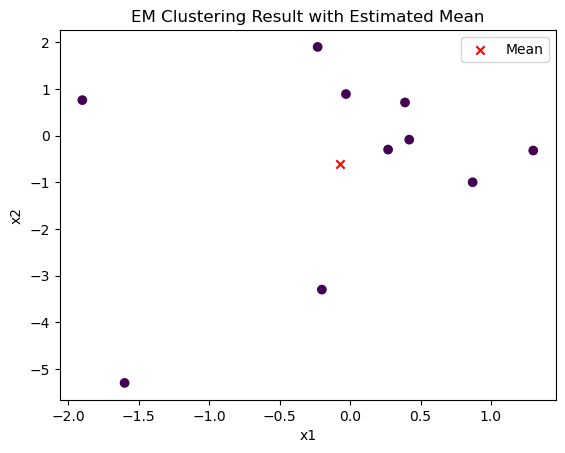

In [74]:
plt.scatter(data_2[:, 0], data_2[:, 1], c=gmm.predict(data_2), cmap='viridis')
plt.scatter(estimated_mean[0], estimated_mean[1], c='red', marker='x', label='Mean')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("EM Clustering Result with Estimated Mean")
plt.show()


2.Compare your final estimate with that for the case when there is no missing data. Display
the obtained result in form of clusters.

C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


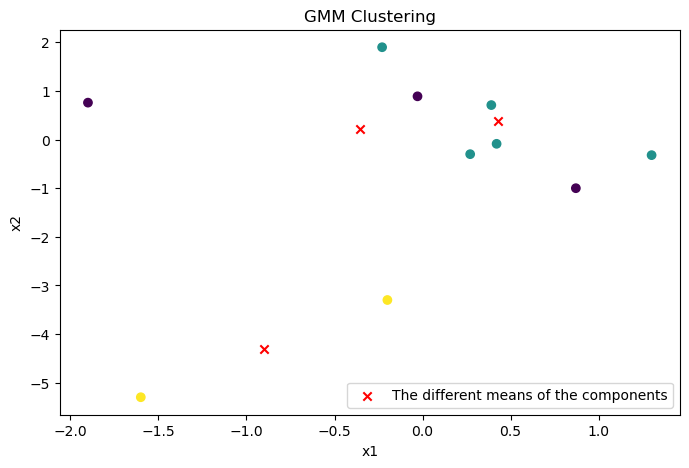

In [75]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

#Full_data consists of all the values from category w1
complete_data = np.array([
    [0.42, -0.087, 0.58],
    [-0.2, -3.3, -3.4],
    [1.3, -0.32, 1.7],
    [0.39, 0.71, 0.23],
    [-1.6, -5.3, -0.15],
    [-0.029, 0.89, -4.7],
    [-0.23, 1.9, 2.2],
    [0.27, -0.3, -0.87],
    [-1.9, 0.76, -2.1],
    [0.87, -1.0, -2.6]
])

gmm_full = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm_full.fit(complete_data)
labels_full = gmm_full.predict(complete_data)

plt.figure(figsize=(8, 5))
plt.scatter(complete_data[:, 0], complete_data[:, 1], c=labels_full, cmap='viridis', marker='o')
plt.scatter(gmm_full.means_[:, 0], gmm_full.means_[:, 1], c='red', marker='x', label='The different means of the components')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('GMM Clustering')
plt.legend()
plt.show()


3.Compare your final estimate with that for the case when there is no missing data in the case
of diagonal covariance. Display the obtained result in form of clusters.

C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


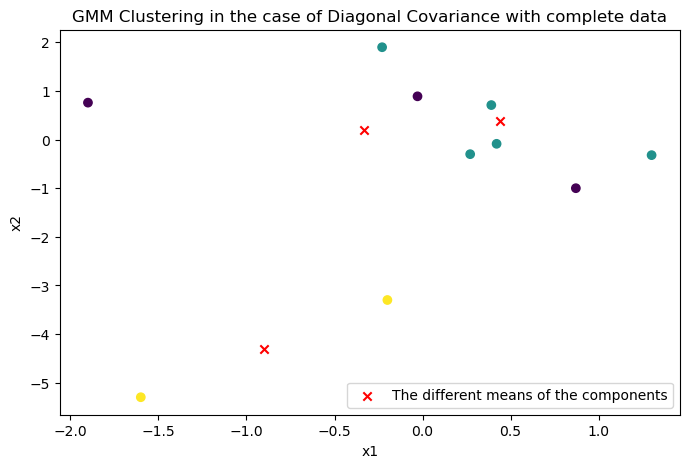

In [76]:
gmm_diag = GaussianMixture(n_components=3, covariance_type='diag', random_state=0)
gmm_diag.fit(complete_data)
labels_diag = gmm_diag.predict(complete_data)

plt.figure(figsize=(8, 5))
plt.scatter(complete_data[:, 0], complete_data[:, 1], c=labels_diag, cmap='viridis', marker='o')
plt.scatter(gmm_diag.means_[:, 0], gmm_diag.means_[:, 1], c='red', marker='x', label='The different means of the components')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('GMM Clustering in the case of Diagonal Covariance with complete data')
plt.legend()
plt.show()


4.Akaike information criterion (AIC) and BIC Bayesian information criterion are both are
used to choose the best k number of components to use in GMM. We choose the lowest
values of AIC and BIC as the best number of components to use in GMM. In Figure 1, best
number of components is 3. In general, their lowest values do not coincide, in this case we
can choose the minimum of their lowest values, the maximum of their lowest values, or
the average of their lowest values.

a. Do a search on internet for the definition of each one of them and explain their
principles.

AIC that is Akaike Information Criterion which helps in evaluating how well a model best fits the data while penalizing the number of parameters. Thereby a lower value of AIC indicate a model that best fits the data with few parameters. AIC aims to find a model that has a balance between both the accuracy as well as the simplicity meaning fewer parameters.
The formula for AIC = 2k - 2In(L)
Next we have Bayesian Information Criterion (BIC), BIC also applies penalty for the number of parameters, but it applies a stronger penalty.
The formula for BIC = kIn(n) - 2In(L)


b. Implement AIC and BIC in Python.
(Hint: I provided you the implementation in Python of AIC and BIC, you can find
it in the method testGMMsklearnBICAIC in the file estimate_gmm_sklearn.py)
c. Draw the AIC and BIC curves for your dataset.
(Hint: you can find how to draw their curves in the method
testGMMsklearnBICAIC)

c. Draw the AIC and BIC curves for your dataset. (Hint: you can find how to draw their curves in the method testGMMsklearnBICAIC)

In [77]:
import numpy as np
import visualization
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
from sklearn.mixture import GaussianMixture


In [78]:
def generate_data(n_data, means, covariances, weights):
    """creates a list of data points"""
    n_clusters, n_features = means.shape
    
    data = np.zeros((n_data, n_features))
    for i in range(n_data):
        # pick a cluster id and create data from this cluster
        k = np.random.choice(n_clusters, size = 1, p = weights)[0]
        x = np.random.multivariate_normal(means[k], covariances[k])
        data[i] = x
   
    return data

def testGMMsklearnBICAIC():
     # Model parameters, including the mean
    # covariance matrix and the weights for each cluster
    init_means = np.array([
        [5, 0],
        [1, 1],
        [0, 5]
    ])
    
    init_covariances = np.array([
        [[.5, 0.], [0, .5]],
        [[.92, .38], [.38, .91]],
        [[.5, 0.], [0, .5]]
    ])
    
    init_weights = [1 / 4, 1 / 2, 1 / 4]
    
    # generate data
    np.random.seed(4)
    X = generate_data(100, init_means, init_covariances, init_weights)
    
    #plt.plot(X[:, 0], X[:, 1], 'ko')
    #plt.tight_layout()
    
    n_components = np.arange(1, 10)
    clfs = [GaussianMixture(n, max_iter = 1000).fit(X) for n in n_components]
    bics = [clf.bic(X) for clf in clfs]
    aics = [clf.aic(X) for clf in clfs]
    
    plt.plot(n_components, bics, label = 'BIC')
    plt.plot(n_components, aics, label = 'AIC')
    plt.xlabel('n_components')
    plt.legend()
    plt.show()
## Generate synthetic data
N,D = 1000, 3 # number of points and dimenstinality

if D == 2:
    #set gaussian ceters and covariances in 2D
    means = np.array([[0.5, 0.0],
                      [0, 0],
                      [-0.5, -0.5],
                      [-0.8, 0.3]])
    covs = np.array([np.diag([0.01, 0.01]),
                     np.diag([0.025, 0.01]),
                     np.diag([0.01, 0.025]),
                     np.diag([0.01, 0.01])])
elif D == 3:
    # set gaussian ceters and covariances in 3D
    means = np.array([[0.5, 0.0, 0.0],
                      [0.0, 0.0, 0.0],
                      [-0.5, -0.5, -0.5],
                      [-0.8, 0.3, 0.4]])
    covs = np.array([np.diag([0.01, 0.01, 0.03]),
                     np.diag([0.08, 0.01, 0.01]),
                     np.diag([0.01, 0.05, 0.01]),
                     np.diag([0.03, 0.07, 0.01])])
n_gaussians = means.shape[0]

points = []
for i in range(len(means)):
    x = np.random.multivariate_normal(means[i], covs[i], N )
    points.append(x)
points = np.concatenate(points)

#fit the gaussian model

gmm = GaussianMixture(n_components=n_gaussians, covariance_type='diag')
gmm.fit(points)



GaussianMixture(covariance_type='diag', n_components=4)

C:\Users\Andrea\Desktop\assgn3-patternrecognition\visualization.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes.scatter(points[idx, 0], points[idx, 1], points[idx, 2], alpha=0.3, c=colors[i])


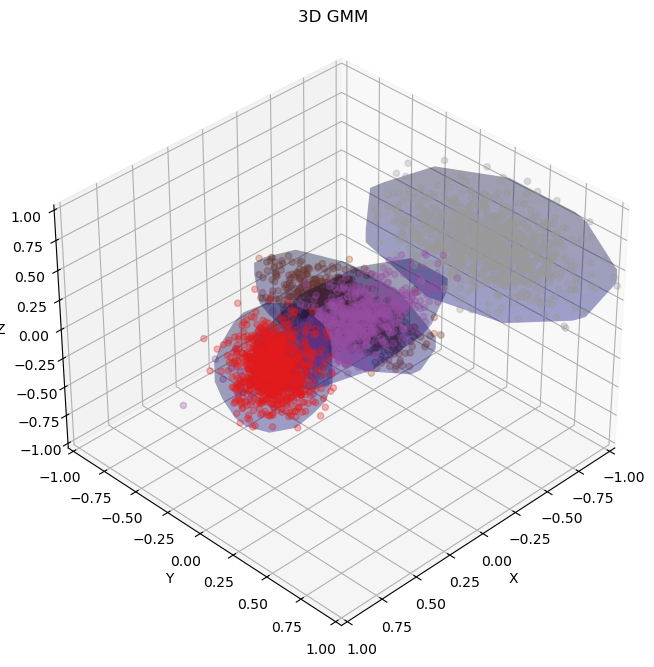

C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.p

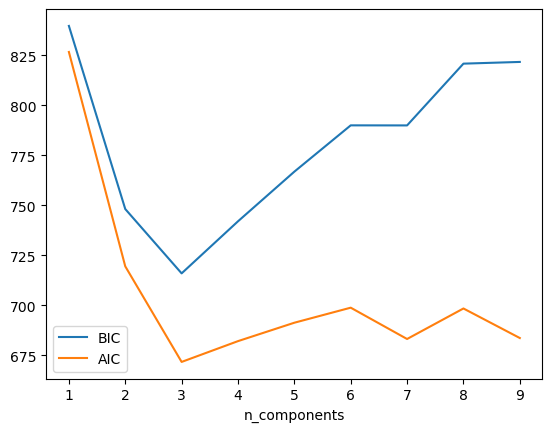

In [79]:
#visualize
if D == 2:
    visualization.visualize_2D_gmm(points, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T)
elif D == 3:
    visualization.visualize_3d_gmm(points, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T)
    
testGMMsklearnBICAIC()


C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.p

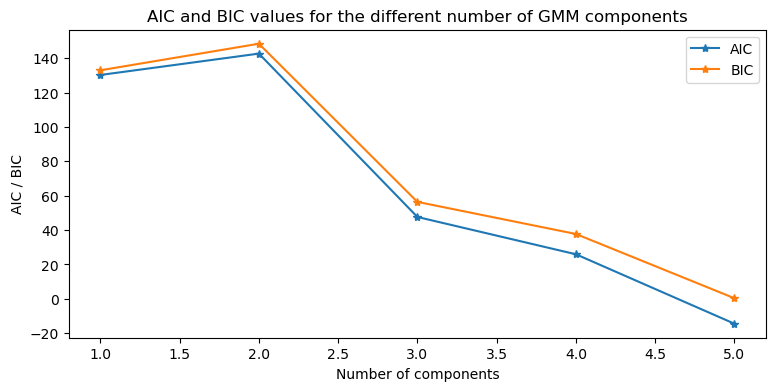

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

data = {
    'x1': [0.42, -0.2, 1.3, 0.39, -1.6, -0.029, -0.23, 0.27, -1.9, 0.87],
    'x2': [-0.087, -3.3, -0.32, 0.71, -5.3, 0.89, 1.9, -0.3, 0.76, -1.0],
    'x3': [0.58, -3.4, 1.7, 0.23, -0.15, -4.7, 2.2, -0.87, -2.1, -2.6]
}

w1_data = pd.DataFrame(data)
data_array = w1_data.values

num_components = range(1, 6)  

aic_values = []
bic_values = []

for n in num_components:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(data_array)
    aic_values.append(gmm.aic(data_array))
    bic_values.append(gmm.bic(data_array))

plt.figure(figsize=(9, 4))
plt.plot(num_components, aic_values, label='AIC', marker='*')
plt.plot(num_components, bic_values, label='BIC', marker='*')
plt.xlabel('Number of components')
plt.ylabel('AIC / BIC')
plt.title("AIC and BIC values for the different number of GMM components")
plt.legend()
plt.show()


C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.p

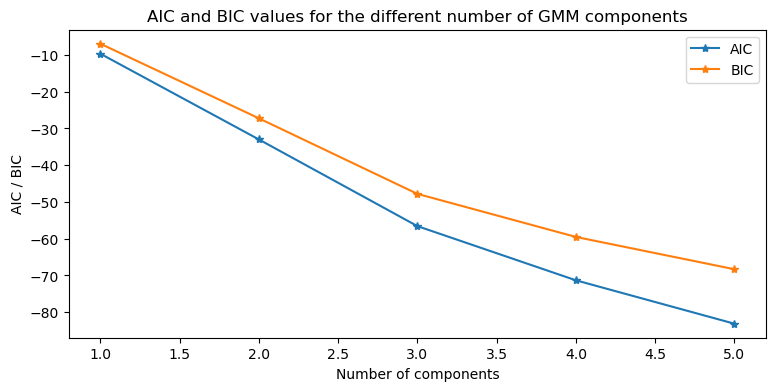

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

data = {
    'x1': [-0.4, -0.31, 0.38, -0.15, -0.35, 0.17, -0.011, -0.27, -0.065, -0.12],
    'x2': [0.58, 0.27, 0.055, 0.53, 0.47, 0.69, 0.55, 0.61, 0.49, 0.054],
    'x3': [0.089, -0.04, -0.035, 0.011, 0.034, 0.1, -0.18, 0.12, 0.0012, -0.063]
}

w2_data = pd.DataFrame(data)
data_array = w2_data.values

num_components = range(1, 6)  

aic_values = []
bic_values = []

for n in num_components:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(data_array)
    aic_values.append(gmm.aic(data_array))
    bic_values.append(gmm.bic(data_array))

plt.figure(figsize=(9, 4))
plt.plot(num_components, aic_values, label='AIC', marker='*')
plt.plot(num_components, bic_values, label='BIC', marker='*')
plt.xlabel('Number of components')
plt.ylabel('AIC / BIC')
plt.title("AIC and BIC values for the different number of GMM components")
plt.legend()
plt.show()


C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andrea\.anaconda\anacondainstall\Lib\site-packages\sklearn\cluster\_kmeans.p

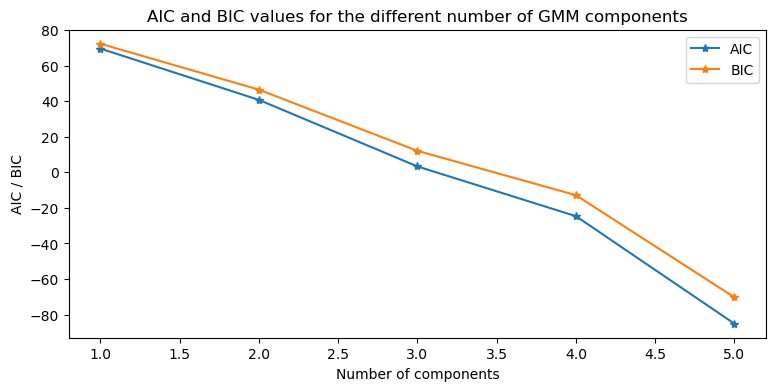

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

data = {
    'x1': [0.83, 1.1, -0.44, 0.047, 0.28, -0.39, 0.34, -0.3, 1.1, 0.18],
    'x2': [1.6, 1.6, -0.41, -0.45, 0.35, -0.48, -0.079, -0.22, 1.2, -0.11],
    'x3': [-0.014, 0.48, 0.32, 1.4, 3.1, 0.11, 0.14, 2.2, -0.46, -0.49]
}

w3_data = pd.DataFrame(data)
data_array = w3_data.values

num_components = range(1, 6)  

aic_values = []
bic_values = []

for n in num_components:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(data_array)
    aic_values.append(gmm.aic(data_array))
    bic_values.append(gmm.bic(data_array))

plt.figure(figsize=(9, 4))
plt.plot(num_components, aic_values, label='AIC', marker='*')
plt.plot(num_components, bic_values, label='BIC', marker='*')
plt.xlabel('Number of components')
plt.ylabel('AIC / BIC')
plt.title("AIC and BIC values for the different number of GMM components")
plt.legend()
plt.show()

d. What is the best number of components to use in your GMM for your dataset? Justify your answer.


With respect to choosing the best number of components to use we can choose the lowest value of AIC and BIC as our best number of components to use in GMM. 
Choosing thw lowest value of AIC - here AIC is used if we our priority is prediction accuracy.
AIC can be used for better predictive performance.
If we choose BIC, BIC has the stroner penalty for additional parameters, BIC will help identify the true underlying model, and can be used in the case of a large dataset.

